<h1>Setting up the Data<h1>

<p>What the following 2 cells do is take the image ids found into the labels.csv file and matches them with their corresponding y value.  The images are then turned into arrays and the resized to a constant sioze to not confuse the model.  The code then takes the data, splits it into the Train, Validation, and Test Splits, to be tfitted and tested in our model<p>

In [1]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#TEST_IMAGE_DIR = "./dog-breed-identification/test/"
TRAIN_IMAGE_DIR = "../dog-breed-identification/train/"
LABELS = '../dog-breed-identification/labels.csv'

data = pd.read_csv(LABELS)

In [2]:
#Data from the csv only contans the ids of the photos and not the photos itself
#Iterate through the data and check whether the photo is in test or train
#Then fetch it and store it in its proper variable
import tensorflow as tf
from os.path import join
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_and_preprocess_images(image_dir, image_ids, target_size=(224, 224)):
    image_data = []
    for img_id in image_ids:
        img_path = join(image_dir, img_id + ".jpg")
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        preprocessed_img = preprocess_input(img_array) #I dont flatten the image here
        image_data.append(preprocessed_img)
    return np.array(image_data)

# Get image IDs for train and test
train_image_ids = data['id'].values
labels = data['breed'].values
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

train_image_ids, unfinished_test_image_ids, train_labels, unfinished_test_labels = train_test_split(train_image_ids, encoded_labels, test_size=0.3, random_state=42, stratify=encoded_labels)

test_image_ids, val_image_ids, test_labels, val_labels = train_test_split(unfinished_test_image_ids, unfinished_test_labels, test_size=0.5, random_state=42, stratify=unfinished_test_labels)

train_images = load_and_preprocess_images(TRAIN_IMAGE_DIR, train_image_ids)
test_images = load_and_preprocess_images(TRAIN_IMAGE_DIR, test_image_ids)
val_images = load_and_preprocess_images(TRAIN_IMAGE_DIR, val_image_ids)

<h3>What A Sample X Data Example Looks Like<h3>

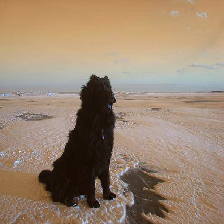

In [3]:
from IPython.display import display

def showImage(imageMatrix):
    image = tf.keras.utils.array_to_img(imageMatrix)
    #image = Image.fromarray(imageMatrix)
    display(image)

showImage(train_images[0])

<h3>What are X data looks like going into the model<h3>

In [4]:
print(train_images[0])

[[[ 57.060997    10.221001   -42.68      ]
  [ 58.060997    11.221001   -41.68      ]
  [ 59.060997    12.221001   -40.68      ]
  ...
  [ 70.061       24.221      -21.68      ]
  [ 71.061       24.221      -25.68      ]
  [ 71.061       24.221      -25.68      ]]

 [[ 58.060997    11.221001   -41.68      ]
  [ 59.060997    12.221001   -40.68      ]
  [ 60.060997    13.221001   -39.68      ]
  ...
  [ 71.061       25.221      -20.68      ]
  [ 75.061       28.221      -21.68      ]
  [ 75.061       28.221      -21.68      ]]

 [[ 60.060997    13.221001   -39.68      ]
  [ 61.060997    14.221001   -38.68      ]
  [ 62.060997    15.221001   -37.68      ]
  ...
  [ 72.061       26.221      -19.68      ]
  [ 74.061       27.221      -22.68      ]
  [ 74.061       27.221      -22.68      ]]

 ...

 [[ 15.060997   -18.779      -40.68      ]
  [  4.060997   -27.779      -49.68      ]
  [ 13.060997   -14.778999   -37.68      ]
  ...
  [ 24.060997    -3.7789993  -29.68      ]
  [ 23.060997    -

<h3>Sample Y Data for Corresponding X Example

In [5]:
y_example = label_encoder.inverse_transform([train_labels[0]])[0]
print(y_example)

newfoundland


<h3>More About Our Dataset<h3>

In [6]:
#Total number of examples used for Training, Validating, and Testing
print(len(data))

10222


<p>All 120 Breeds/Classes that Our Classifiers Determine<p>

In [20]:
print(data["breed"].unique())

['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'borzoi' 'basenji' 'scottish_deerhound'
 'shetland_sheepdog' 'walker_hound' 'maltese_dog' 'norfolk_terrier'
 'african_hunting_dog' 'wire-haired_fox_terrier' 'redbone'
 'lakeland_terrier' 'boxer' 'doberman' 'otterhound' 'standard_schnauzer'
 'irish_water_spaniel' 'black-and-tan_coonhound' 'cairn' 'affenpinscher'
 'labrador_retriever' 'ibizan_hound' 'english_setter' 'weimaraner'
 'giant_schnauzer' 'groenendael' 'dhole' 'toy_poodle' 'border_terrier'
 'tibetan_terrier' 'norwegian_elkhound' 'shih-tzu' 'irish_terrier'
 'kuvasz' 'german_shepherd' 'greater_swiss_mountain_dog' 'basset'
 'australian_terrier' 'schipperke' 'rhodesian_ridgeback' 'irish_setter'
 'appenzeller' 'bloodhound' 'samoyed' 'miniature_schnauzer'
 'brittany_spaniel' 'kelpie' 'papillon' 'border_collie' 'entlebucher'
 'collie' 'malamute' 'welsh_springer_spaniel' 'chihuahua' 'saluki' 'pug'
 'malinois' 'komondor' 'airedale' 'leonberg' 'mexican_h

<p>How the Data is Spread Out<p>

breed
affenpinscher                      80
afghan_hound                      116
african_hunting_dog                86
airedale                          107
american_staffordshire_terrier     74
                                 ... 
welsh_springer_spaniel             79
west_highland_white_terrier        81
whippet                            95
wire-haired_fox_terrier            82
yorkshire_terrier                  82
Length: 120, dtype: int64


<AxesSubplot: xlabel='breed'>

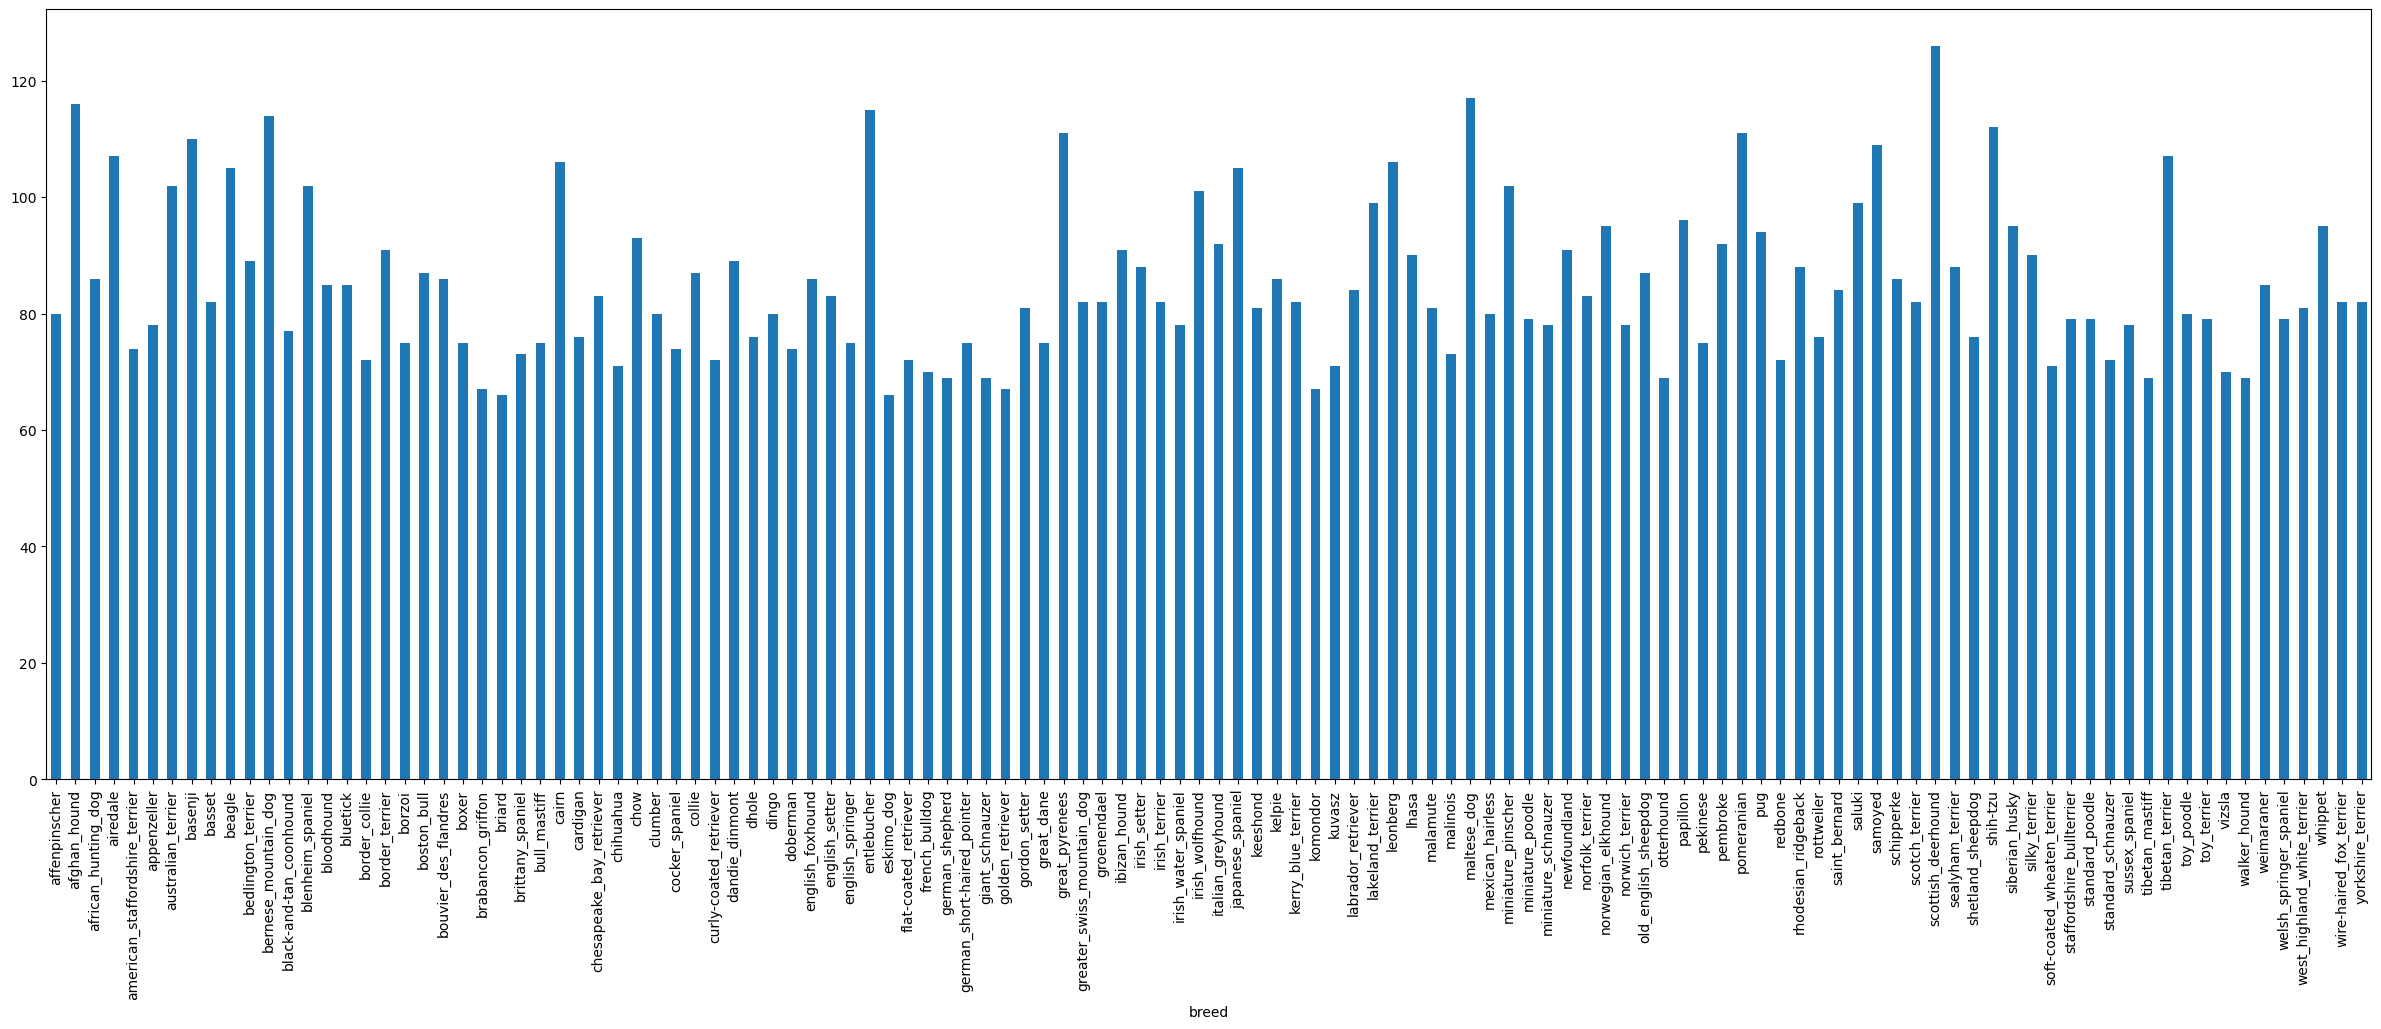

In [21]:
classes = data.pivot_table(index = ['breed'], aggfunc ='size')
print(classes)
classes.plot.bar(figsize=(30,10))

In [39]:
maxBreed = classes.idxmax()
maxVal = classes.max()

print("The %s breed has the most examples in the dataset with %d examples leading it to being %.5f%% of all training examples " % (maxBreed, maxVal, maxVal/len(data)))

The scottish_deerhound breed has the most examples in the dataset with 126 examples leading it to being 0.01233% of all training examples 


In [40]:
minBreed = classes.idxmin()
minVal = classes.min()

print("The %s breed has the least examples in the dataset with %d examples leading it to being %.5f%% of all training examples " % (minBreed, minVal, minVal/len(data)))

The briard breed has the least examples in the dataset with 66 examples leading it to being 0.00646% of all training examples 
